In [5]:
import numpy as np
import pandas as pd
from IPython.display import Image

##  Use genetic algorithms
to determine the maximum of the solution  $$𝑓(𝑥) = −𝑥2 + 8𝑥 + 15$$  over the discrete range of 𝑥-values: [0,15] where 𝑓(𝑥) is the fitness function. Fitness key has been provided. 

In [31]:
Fitness_key = {'1011': 15, '0011': 22, '1001': 27, '1000': 30, 
               '0010': 31, '0001': 30, '0000': 27, '1010': 22, 
               '0100': 15, '1100': 6, '0101': -5, '0110': -18, 
               '0111': -33, '1101': -50,'1110': -69, '1111': -90}

def get_fitness(individual):
    """
    Looks up fitness value of an individual in a population

    Parameters
    ----------
    individual: string
        individual's encoding string

    Returns
    -------
    fitness : int
        individual's fitness value
    """
    fitness_value = Fitness_key[individual]

    return fitness_value

In [30]:
get_fitness('1011')

15

Below we are provided 2 encodings. Decide which is better based on schema, order and length. Good solutions are those with fitness value >27.

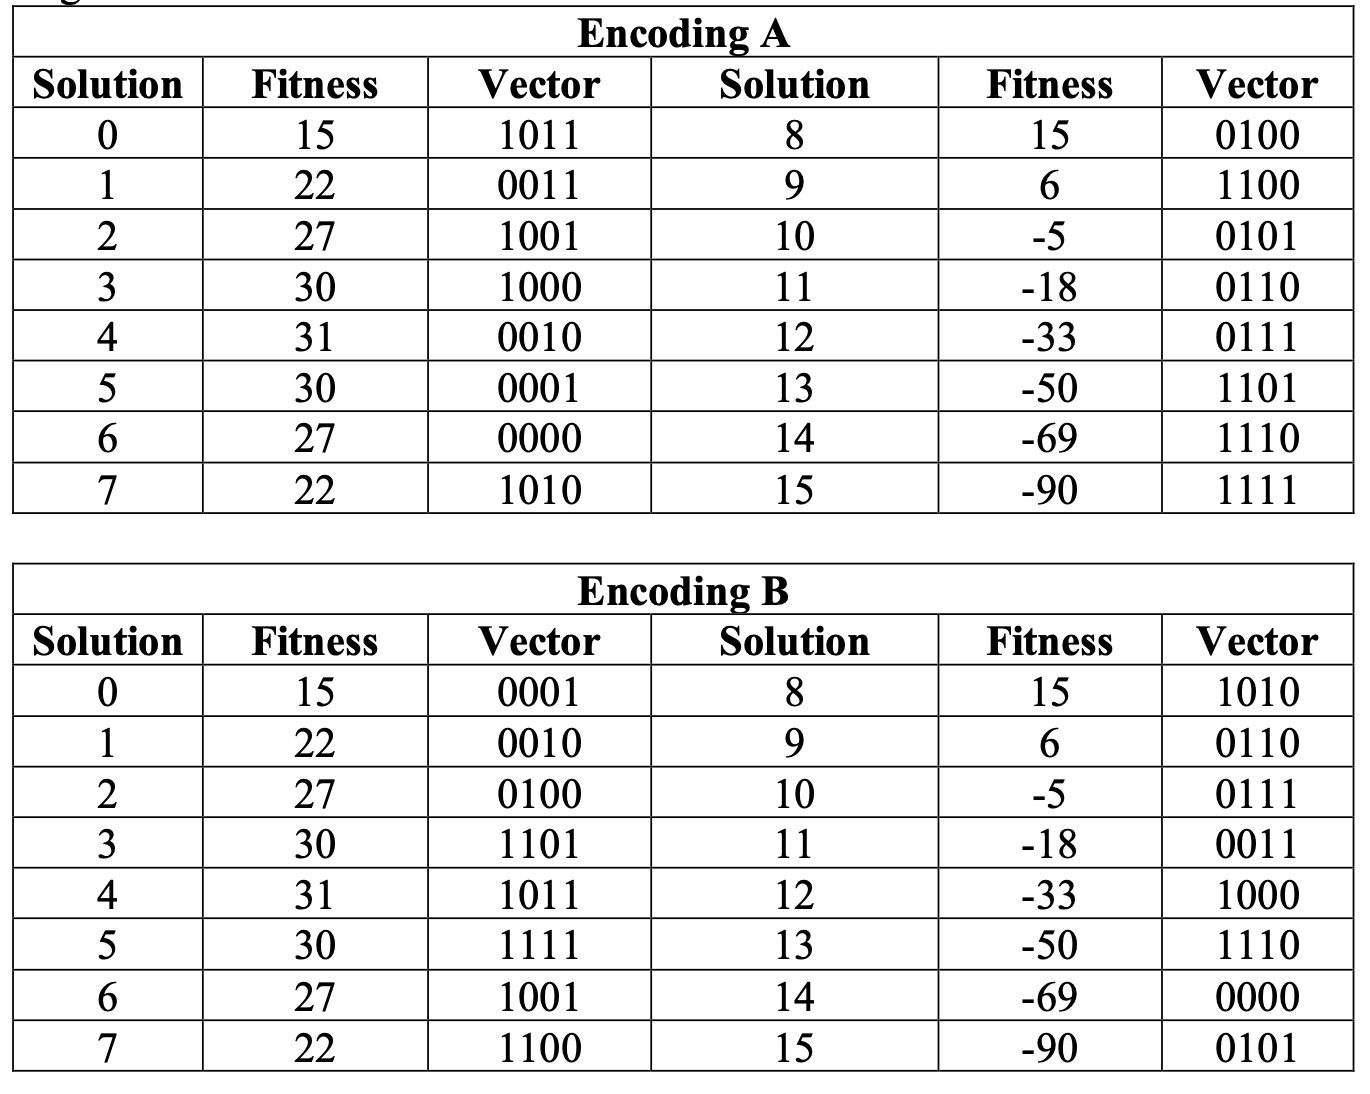

In [7]:
Image(filename='image01.png')

### 1a

ENCODING A
Good solutions are: 3, 4, 5
Schema here is *0**, with order of 1 and length of 0.

ENCODING B
Good solutions are: 3, 4, 5.
Schema here is 1**1, with order of 2 and length of 3.

I will be using ENCODING A, because shorter, lower order schema with high fitness will increase exponentially in descendant generations.

### 1b

We draw candidates 10, 1, 15, 6, 0 and 9 from ENCODING A and pair the most fit with the least fit members.

In [9]:
encodingA_data = {'Solution': [6, 15, 1, 10,  0, 9], 'Fitness': [27, -90, 22, -5, 15, 6], 'Encoding': ['0000', '1111', '0011', '0101', '1011', '1100']}
F0_df = pd.DataFrame(data=encodingA_data, index=['Pairing 1a', 'Pairing 1b', 'Pairing 2a', 'Pairing 2b','Pairing 3a', 'Pairing 3b'])
F0_df

,Solution,Fitness,Encoding
Pairing 1a,6,27,0000
Pairing 1b,15,-90,1111
Pairing 2a,1,22,0011
Pairing 2b,10,-5,0101
Pairing 3a,0,15,1011
Pairing 3b,9,6,1100


### 1c

In [13]:
F0_population = F0_df['Encoding'].tolist()

def crossover(a, b):
    """
    This function performs a crossover. It exchanges the last three elements of each string.

    Parameters
    ----------
    a,b : strings
        parent chromosomes

    Returns
    -------
    offspring : list
        list of offspring
    """
    offspring1 = a[0] + b[1:4]
    offspring2 = b[0] + a[1:4]

    return [offspring1, offspring2]

In [19]:
# PERFORM CROSSOVER BETWEEN PAIRS
Pair1_offspring = crossover(F0_df.iloc[0, 2], F0_df.iloc[1, 2])
Pair2_offspring = crossover(F0_df.iloc[2, 2], F0_df.iloc[3, 2])
Pair3_offspring = crossover(F0_df.iloc[4, 2], F0_df.iloc[5, 2])

F1_population = Pair1_offspring + Pair2_offspring + Pair3_offspring
F1_population

['0111', '1000', '0101', '0011', '1100', '1011']

Pairing 1 has given us two new solutions: 0111 and 1000. The fitness of  the new solutions and of the F1 population are as follows:

In [22]:
def population_fitness(population):
    """
    This function pulls fitness values for a population

    Parameters
    ----------
    population : list (or array) of encoded strings
        genetic vectors of current population

    Returns
    -------
    population_fitness : int
        total fitness value of population
    """
    fitnesses = []
    for individual in population:
        new_fitness_values = Fitness_key.get(individual)
        fitnesses.append(int(new_fitness_values))

    sum = 0
    for i in fitnesses:
        sum += i

    return sum

print(f'Fitness of vector 0111 is {get_fitness("0111")} and fitness of vector 1000 is {get_fitness("1000")}')
print(f'Fitness of F0 generation is: {population_fitness(F0_population)}.')
print(f'Fitness of F1 generation is: {population_fitness(F1_population)}.')

Fitness of vector 0111 is -33 and fitness of vector 1000 is 30
Fitness of F0 generation is: -25.
Fitness of F1 generation is: 35.


Yes, fitness has increased from F0 to F1.

### 1d Mutate third element

In [23]:
mutated_F1_population = []
for individual in F1_population:
    third_element = individual[2]

    if third_element == "0":
        mutated_element = "1"
    if third_element == "1":
        mutated_element = "0"

    mutated_individual = individual[0:2] + mutated_element + individual[3:]
    mutated_F1_population.append(mutated_individual)

print(f'Fitness of F1 generation is: {population_fitness(F1_population)}.')
print(f'Fitness of mutated F1 population is: {population_fitness(mutated_F1_population)}')

Fitness of F1 generation is: 35.
Fitness of mutated F1 population is: -28


Fitness has not increased in the mutated F1 population.

Compared to the F1 population, there are new solutions in the mutated F1 population: 1010, 0001, 1110, 1001. Their fitnesses are as follows.

In [33]:
print(f"Fitness of '1010' is {get_fitness('1010')}")
print(f"Fitness of '0001' is {get_fitness('0001')}")
print(f"Fitness of '1110' is {get_fitness('1110')}")
print(f"Fitness of '1001' is {get_fitness('1001')}")

Fitness of '1010' is 22
Fitness of '0001' is 30
Fitness of '1110' is -69
Fitness of '1001' is 27


No, this mutation has not increased fitness in the population.

### 1e Take the mutated population and perform natural selection, where we eliminate the least fit member and replicate the most fit

In [36]:
def natural_selection(population):
    """
    This function eliminates the least fit member of the population and clones the fittest member.

    Parameters
    ----------
    population : list
        list of all solutions

    Returns
    -------
    mutated population : list
        list of mutated solutions
    """
    fittest_individual = max(population, key=get_fitness)
    least_fit_individual = min(population, key=get_fitness)
    # replace index of least fit with fittest
    population[population.index(least_fit_individual)] = fittest_individual

    return population

print(natural_selection(mutated_F1_population))

['0101', '1010', '0001', '0001', '0001', '1001']


In [44]:
def two_point_crossover(a,b):
    """
    This function performs a 2-point crossover. It exchanges the middle two elements of two strings.

    Parameters
    ----------
    a, b : string
        two individuals to crossover between.

    Returns
    -------
    offspring1, offspring2 : string
        individuals resulting from crossover
    """
    offspring1 = a[0] + b[1:3] + a[3]
    offspring2 = b[0] + a[1:3] + b[3]

    return [offspring1, offspring2]

# perform two-point crossover between members of mutated F1
F2_population = (two_point_crossover(mutated_F1_population[0], mutated_F1_population[1])
                + two_point_crossover(mutated_F1_population[2], mutated_F1_population[3]) 
                +two_point_crossover(mutated_F1_population[4], mutated_F1_population[5]))
print(f"F2 population: {F2_population}")

F2 population: ['0011', '1100', '0001', '0001', '0001', '1001']


New solutions from the two-point crossover are 0011,  1100, 1000, 1111.

In [53]:
print('Popuation fitness of F2 solutions is:', population_fitness(F2_population))
print(f"Individual fitnesses: {get_fitness('0011')}, {get_fitness('1100')}, {get_fitness('1000')}, {get_fitness('1111')}")

Popuation fitness of F2 solutions is: 145
Individual fitnesses: 22, 6, 30, -90


No, the two point crossover has not increased fitness in the population.

### 1f

In [12]:
natural_selection(F2_population)

def crossover_3_4_switch_3(a,b):
    """
    This function does a cross over between 3rd and 4th elements then exchanges first 3 elements.
    """
    middle1 = a[0:2] + a[3] + a[2]
    middle2 = b[0:2] + b[3] + b[2]

    offspring1 = middle2[0:3] + middle1[3]
    offspring2 = middle1[0:3] + middle2[3]

    return [offspring1, offspring2]

mutated_F2_population = (crossover_3_4_switch_3(F2_population[0], F2_population[1]) 
                         + crossover_3_4_switch_3(F2_population[2], F2_population[3]) 
                         + crossover_3_4_switch_3(F2_population[4], F2_population[5]))

print(f'Mutated F2 population is {mutated_F2_population}.')

Mutated F2 population is ['1101', '0010', '0110', '0011', '0010', '1000'].


New solutions are 1101, 0010, and 0110. Below are their fitness values:


In [13]:
print(fitness('1101'))
print(fitness('0010'))
print(fitness('0110'))

population_fitness(mutated_F2_population)

-50
31
-18


46

Yes, this cross has increased fitness in the population.

### 1g

no, I don't think the solution space was adequate for maximizing this function. There are only 16 solutions so crossovers ended up being repetitive and not yielding many new reesults. We could increase this number by making the encodings (for example) 5 digits instead of 4. With more possible solutions, we are more likely to find a better maximum.

## 2. Artificial Neural Networks

In [14]:
class NeuralNetwork:
    def __init__(self, input_neurons, hidden_layer, output_neurons):
        # initialize weights
        np.random.seed(0)
        self.weights_ih = np.random.rand(input_neurons, hidden_layer)
        self.bias_h = np.random.rand()
        
        self.weights_ho = np.random.rand(hidden_layer, output_neurons)
        self.bias_o = np.random.rand()


    def feed_forward(self, x):
        hidden = np.tanh(np.dot(x, self.weights_ih) + self.bias_h)
        output = np.tanh(np.dot(hidden, self.weights_ho) + self.bias_o)

        return output
    
    def backprop(self, x, output, alpha):
        hidden = np.tanh(np.dot(x, self.weights_ih) + self.bias_h)
        z = hidden * self.weights_ho + self.bias_h
        observed_output = np.array([-1, -1])
        theta21_output = output[0]
        theta22_output = output[1]

        delta_n21 = (theta21_output - observed_output[0]) * (1- np.tanh(theta21_output)**2)
        delta_n22 = (theta22_output - observed_output[1]) * (1- np.tanh(theta22_output)**2)

        self.weights_ho = self.weights_ho - alpha * self.weights_ho * 1 - np.tanh(z)**2 * (np.tanh(z) - output)
        self.bias_h = self.bias_h - alpha * 1 - np.tanh(z)**2 * (np.tanh(z) - output)

        return np.array([delta_n21, delta_n22])

network = NeuralNetwork(6,2,2)
input = np.array([-1, 1, -1, -1, 1, -1])


model_output = network.feed_forward(input)
print(model_output)


[0.6016075 0.669866 ]


In [15]:
network.backprop(input, model_output, 0.01)

array([1.13770012, 1.09860762])

# answer can be found in ../Tutorials/Tutorial-6.ipynb